<a href="https://colab.research.google.com/github/dewipuspita0904/MembangunProyekMachineLearning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Your_Name_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset sumber: https://www.kaggle.com/datasets/krishnanshverma/academic-performance-of-university-student-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [112]:
# Import Library Dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [113]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [114]:
# Clustering
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold, mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [115]:
# Visualisasi tambahan
from yellowbrick.cluster import KElbowVisualizer

In [116]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [117]:
#Pengecekan apakah dataset tersedia sebelum membaca data
file_path = "/content/academic_performance_dataset_V2.csv"

if os.path.exists(file_path):
    data_df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
else:
    raise FileNotFoundError("Error: File dataset tidak ditemukan!")

Dataset berhasil dimuat!


In [118]:
# Menampilkan 10 baris pertama
display(data_df.head(10))

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24
5,51740,BCH,Male,2010,2.97,2.66,2.98,3.28,3.07,3.13
6,76075,BCH,Male,2010,3.34,3.68,3.00,3.44,3.28,3.02
7,60888,BCH,Female,2010,2.56,2.30,2.50,2.29,2.77,2.68
8,43378,BCH,Male,2010,3.76,3.30,3.64,3.88,4.37,3.13
9,80307,BCH,Female,2010,3.96,3.94,3.89,3.81,4.17,3.98


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [119]:
# Tinjau jenis data tiap kolom
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID No      3046 non-null   int64  
 1   Prog Code  3046 non-null   object 
 2   Gender     3046 non-null   object 
 3   YoG        3046 non-null   int64  
 4   CGPA       3046 non-null   float64
 5   CGPA100    3046 non-null   float64
 6   CGPA200    3046 non-null   float64
 7   CGPA300    3046 non-null   float64
 8   CGPA400    3046 non-null   float64
 9   SGPA       3046 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 238.1+ KB


In [120]:
# Pisahkan kolom numerik dan kategorikal
num_cols = data_df.select_dtypes(include=['number']).columns
cat_cols = data_df.select_dtypes(include=['object', 'category']).columns
print(f"\nKolom numerik: {list(num_cols)}")
print(f"Kolom kategorikal: {list(cat_cols)}")


Kolom numerik: ['ID No', 'YoG', 'CGPA', 'CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'SGPA']
Kolom kategorikal: ['Prog Code', 'Gender']


In [121]:
# Cek jumlah missing values di setiap kolom
missing_values = data_df.isnull().sum()
missing_percentage = (data_df.isnull().sum() / len(data_df)) * 100

In [122]:
# Tampilkan hanya kolom yang memiliki missing values
missing_df = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase (%)': missing_percentage})
print("\nMissing Values dalam Dataset:\n", missing_df[missing_df['Jumlah Missing'] > 0])


Missing Values dalam Dataset:
 Empty DataFrame
Columns: [Jumlah Missing, Persentase (%)]
Index: []


In [123]:
# Mengisi missing values
data_df[num_cols] = data_df[num_cols].fillna(data_df[num_cols].median())
data_df[cat_cols] = data_df[cat_cols].fillna(data_df[cat_cols].mode().iloc[0])

In [124]:
# Statistik deskriptif untuk kolom numerik
data_df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,ID No,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
count,3046.00,3046.00,3046.00,3046.00,3046.00,3046.00,3046.00,3046.00
mean,61082.82,2012.18,3.49,3.64,3.32,3.42,3.53,3.12
std,21256.53,1.33,0.69,0.68,0.78,0.86,0.80,0.62
min,23462.00,2010.00,1.52,1.57,1.17,0.63,0.00,1.46
25%,42654.25,2011.00,3.00,3.18,2.76,2.81,3.00,2.66
50%,61759.00,2012.00,3.56,3.69,3.34,3.51,3.62,3.06
75%,79236.25,2013.00,4.01,4.15,3.92,4.10,4.15,3.57
max,97563.00,2014.00,4.99,5.00,5.00,5.00,5.00,4.93


<Figure size 1200x600 with 0 Axes>

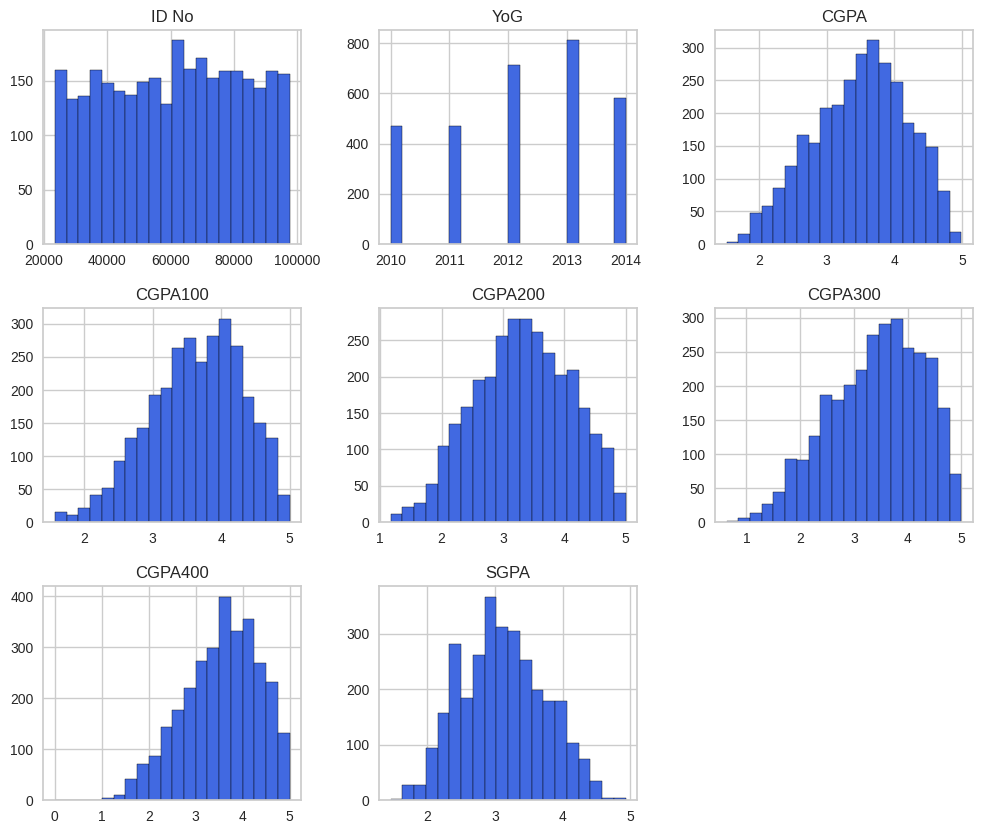

In [125]:
# Visualisasi distribusi numerik
plt.figure(figsize=(12, 6))
data_df[num_cols].hist(bins=20, color="royalblue", edgecolor="black", figsize=(12,10), layout=(len(num_cols) // 3+1, 3))
plt.show()

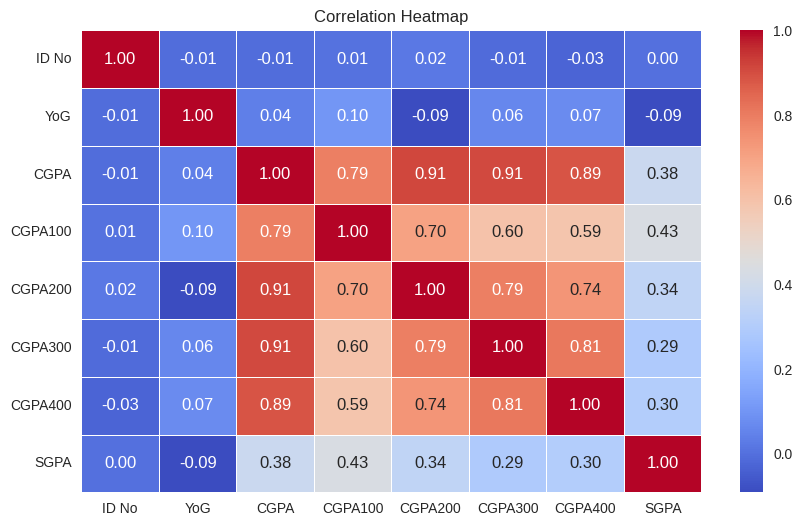

In [126]:
# Periksa korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(data_df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x600 with 0 Axes>

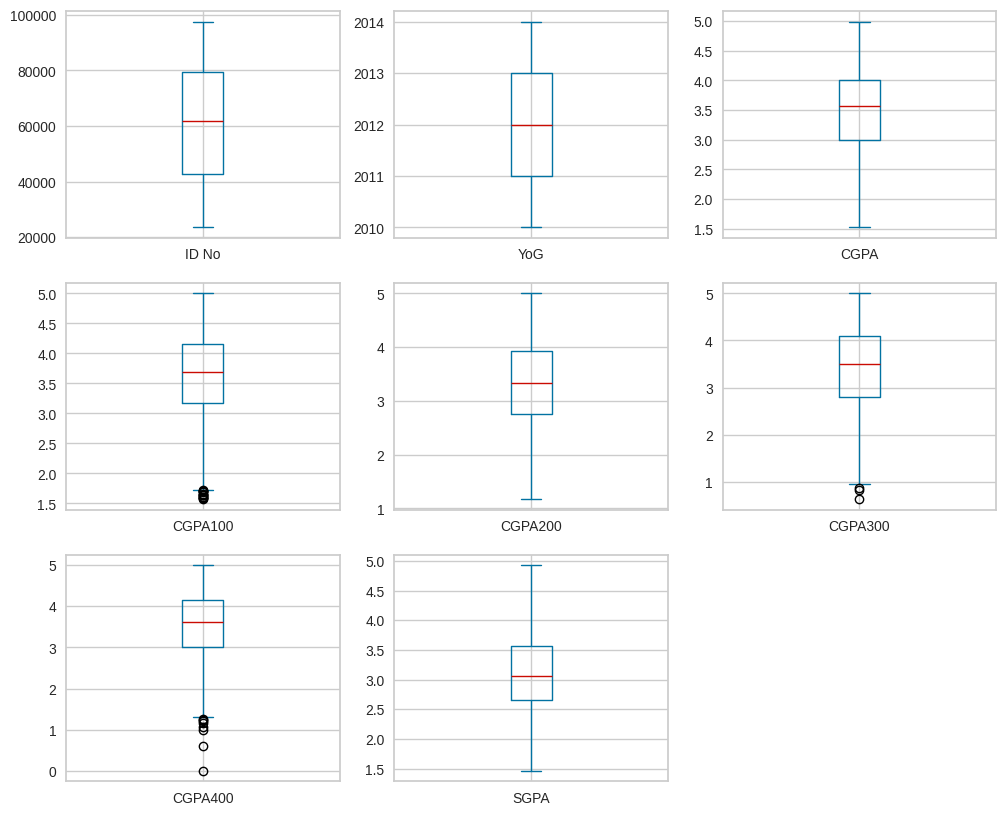

In [127]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
data_df[num_cols].plot(kind='box', subplots=True, layout=(len(num_cols) // 3 + 1, 3), figsize=(12, 10))
plt.show()

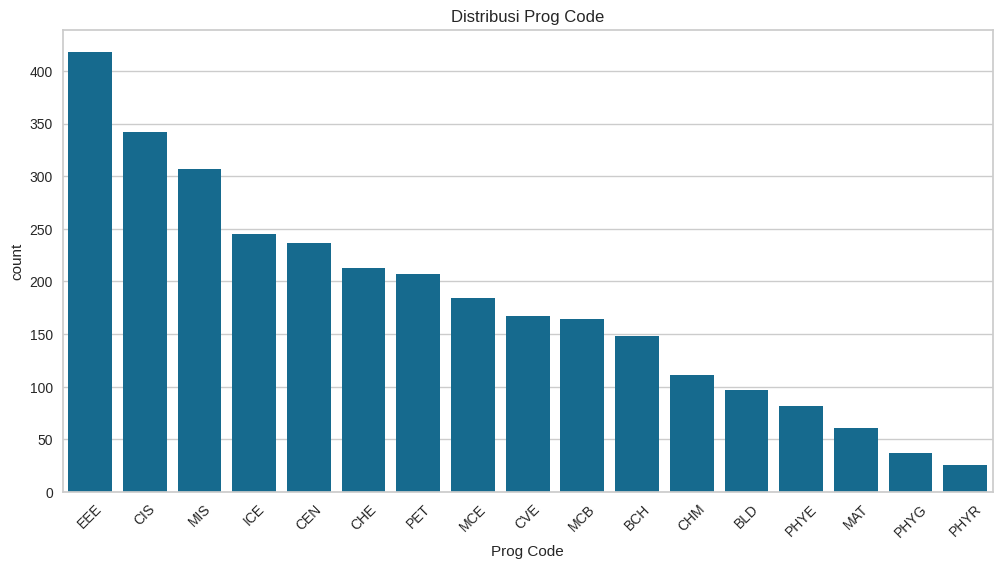

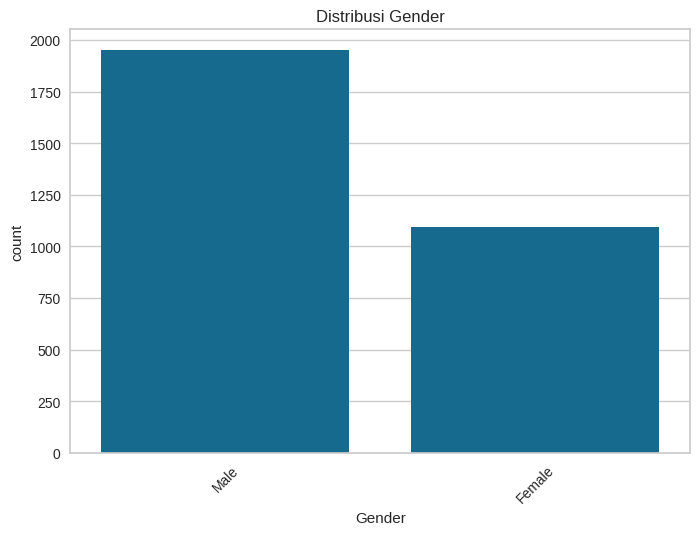

In [128]:
# Distribusi variabel kategorikal
plt.figure(figsize=(12, 6))
for col in cat_cols:
    sns.countplot(data=data_df, x=col, order=data_df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribusi {col}")
    plt.show()

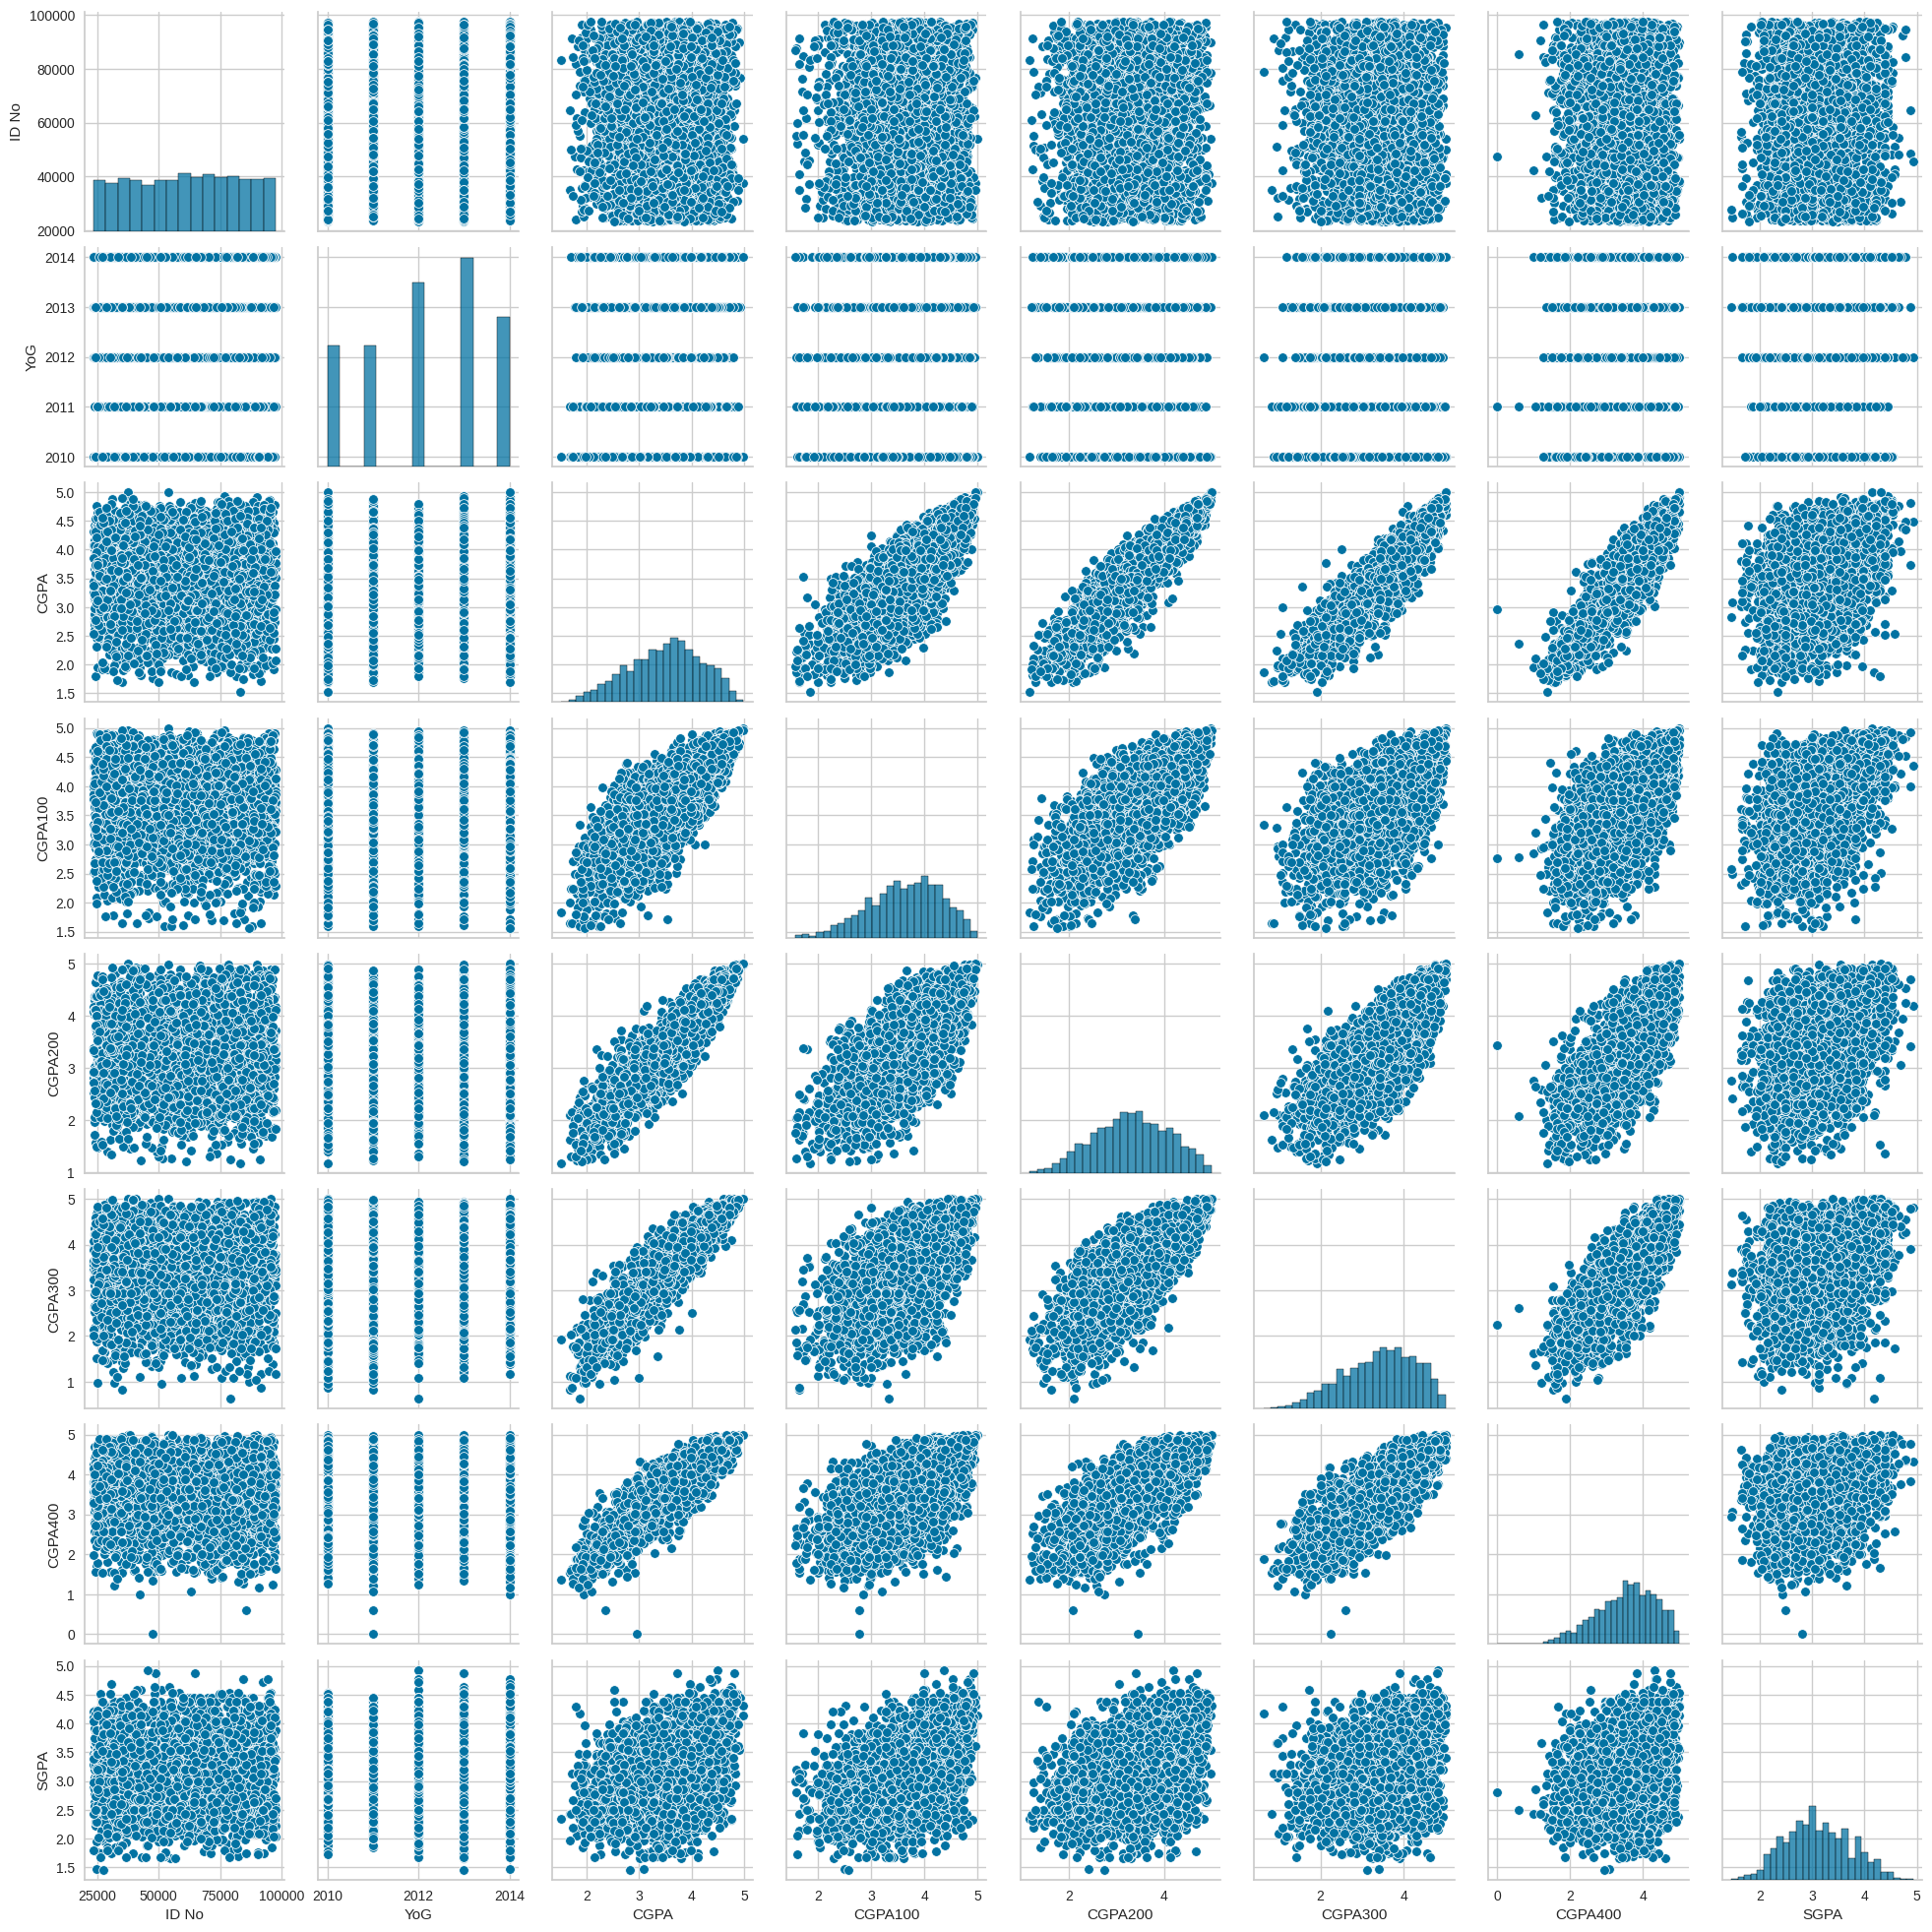

In [129]:
# Pairplot untuk melihat hubungan antar fitur numerik
sns.pairplot(data_df[num_cols])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [130]:
# Cek kembali missing values
data_df.isnull().sum()

,0
ID No,0
Prog Code,0
Gender,0
YoG,0
CGPA,0
CGPA100,0
CGPA200,0
CGPA300,0
CGPA400,0
SGPA,0


In [131]:
# Menghapus baris jika ada nilai kosong
data_df.dropna(inplace=True)
data_df.isnull().sum()

,0
ID No,0
Prog Code,0
Gender,0
YoG,0
CGPA,0
CGPA100,0
CGPA200,0
CGPA300,0
CGPA400,0
SGPA,0


In [132]:
# Cek data duplikasi
data_df.duplicated().sum()

np.int64(0)

In [133]:
data_df.drop_duplicates(inplace=True)
data_df.shape[0]

3046

In [134]:
# Inisialisasi normalisasi
min_max_scaler = MinMaxScaler()

In [135]:
# Normalisasi data dengan MinMaxScaler
data_normalized = data_df.copy()
data_normalized[['CGPA', 'CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'SGPA']] = min_max_scaler.fit_transform(data_normalized[['CGPA', 'CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'SGPA']])
data_normalized.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,0.492795,0.381924,0.603133,0.455378,0.580,0.481268
1,70978,BCH,Female,2010,0.593660,0.489796,0.806789,0.627002,0.694,0.449568
2,31602,BCH,Male,2010,0.198847,0.061224,0.211488,0.196796,0.502,0.210375
3,63847,BCH,Male,2010,0.340058,0.320700,0.331593,0.313501,0.470,0.498559
4,30158,BCH,Female,2010,0.680115,0.594752,0.657963,0.686499,0.916,0.801153


In [136]:
# Deteksi dan penanganan outlier menggunakan IQR
def remove_outliers_iqr(data_df, columns):
    Q1 = data_df[columns].quantile(0.25)
    Q3 = data_df[columns].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data_df[columns] < (Q1 - 1.5 * IQR)) | (data_df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    return data_df.loc[mask], mask

In [137]:
# Identifikasi kolom numerik untuk outlier detection
num_cols = data_df.select_dtypes(include=['number']).columns
data_cleaned = remove_outliers_iqr(data_df, num_cols)[0]
num_cols.tolist()

['ID No', 'YoG', 'CGPA', 'CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'SGPA']

In [138]:
# Encoding data kategorikal
label_encoder = LabelEncoder()

df_labeled = data_cleaned.copy()

In [139]:
# Label encoding
df_labeled[['Prog Code', 'Gender']] = data_cleaned[['Prog Code', 'Gender']].apply(label_encoder.fit_transform)

In [140]:
# One-hot encoding
df_one_hot = pd.get_dummies(df_labeled, columns=['Gender'])
df_one_hot.head()

,ID No,Prog Code,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA,Gender_0,Gender_1
0,42308,8,2010,3.23,2.88,3.48,2.62,2.90,3.13,True,False
1,70978,0,2010,3.58,3.25,4.26,3.37,3.47,3.02,True,False
2,31602,0,2010,2.21,1.78,1.98,1.49,2.51,2.19,False,True
3,63847,0,2010,2.70,2.67,2.44,2.00,2.35,3.19,False,True
4,30158,0,2010,3.88,3.61,3.69,3.63,4.58,4.24,True,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [141]:
# Pilih fitur numerik untuk clustering
selected_features = ['CGPA', 'CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'SGPA', 'Gender_0', 'Gender_1']
X_cluster = df_one_hot[selected_features]
X_cluster

,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA,Gender_0,Gender_1
0,3.23,2.88,3.48,2.62,2.90,3.13,True,False
1,3.58,3.25,4.26,3.37,3.47,3.02,True,False
2,2.21,1.78,1.98,1.49,2.51,2.19,False,True
3,2.70,2.67,2.44,2.00,2.35,3.19,False,True
4,3.88,3.61,3.69,3.63,4.58,4.24,True,False
...,...,...,...,...,...,...,...,...
3041,4.18,4.04,4.23,4.16,4.28,3.20,True,False
3042,2.91,2.36,3.35,2.87,3.02,2.03,False,True
3043,3.66,3.42,3.83,3.55,3.82,3.33,False,True
3044,4.56,4.39,4.70,4.58,4.63,3.52,True,False


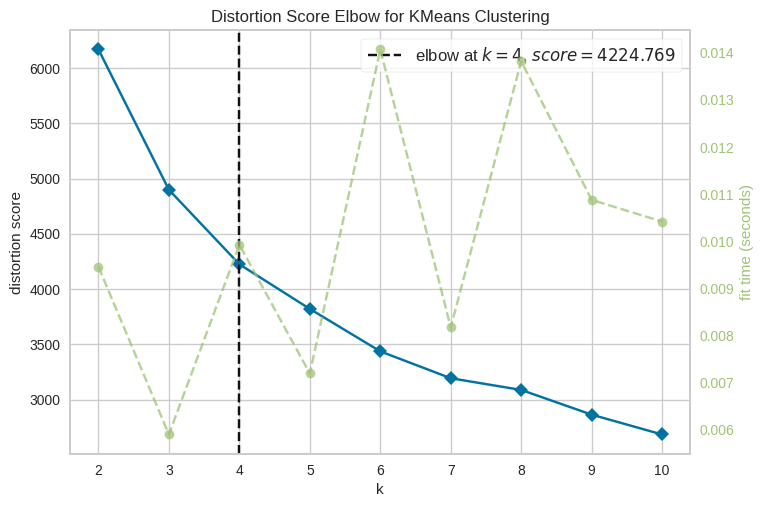

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
# Inisialisasi model KMeans
kmeans = KMeans()

# Inisialisasi visualizer KElbow
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Fit visualizer dengan data
visualizer.fit(X_cluster)

# Menampilkan grafik elbow
visualizer.show()

In [145]:
# Kurangi dimensi data menjadi 2 dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

In [146]:
# Ambil k optimal
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=np.int64(4), random_state=69)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [147]:
# Nilai Silhouette Score
sil_score = silhouette_score(X_pca, kmeans.labels_)
print(f"Silhouette Score for K={optimal_k}: {sil_score}")

Silhouette Score for K=4: 0.32466901721350255


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

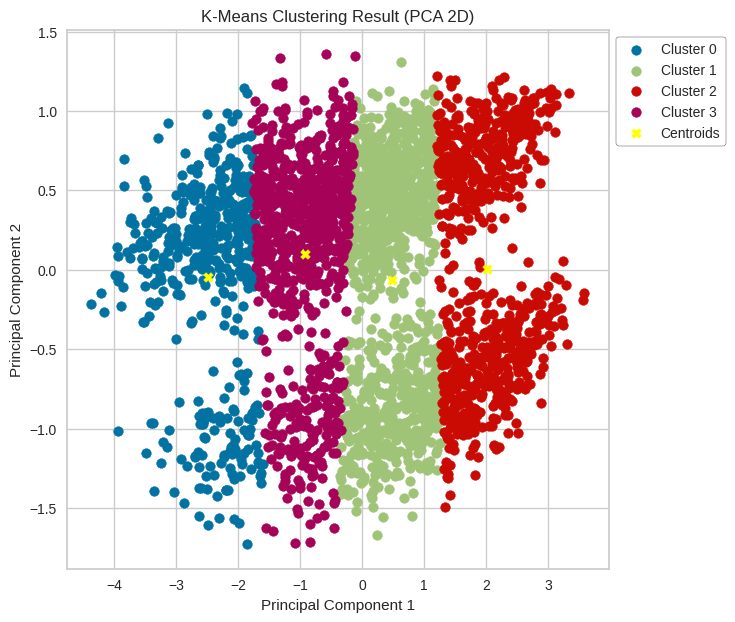

In [148]:
# Visualisasi per cluster
plt.figure(figsize=(7, 7))
for i in range(4):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker='X', label='Centroids')
plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [149]:
# Data hasil clustering setelah outlier ditangani
df_labeled = data_cleaned.copy()
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA,Cluster
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13,3
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02,1
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19,0
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19,0
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24,1


In [150]:
# Jumlah data per cluster
cluster_count = df_labeled['Cluster'].value_counts()
cluster_count

,count
Cluster,
1,1023
3,814
2,713
0,473


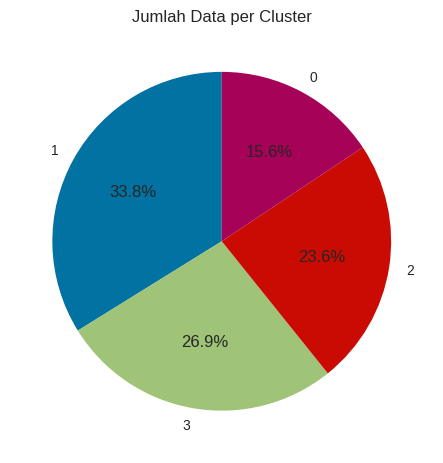

In [151]:
# Visualisasi
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Jumlah Data per Cluster')
plt.show()

In [152]:
# Rataan per cluster
df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()

,ID No,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
Cluster,,,,,,,,
0,62218.042283,2011.987315,2.420338,2.833298,2.235159,2.167104,2.378943,2.783383
1,61805.554252,2012.297165,3.717986,3.761554,3.524321,3.711955,3.789120,3.118358
2,60527.489481,2012.126227,4.367405,4.327546,4.272216,4.415330,4.417391,3.503745
3,59805.210074,2012.211302,3.112887,3.382346,2.898415,2.945921,3.153059,2.988231


In [153]:
# Median per cluster
df_labeled.select_dtypes(include=['number']).groupby('Cluster').median()

,ID No,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
Cluster,,,,,,,,
0,62634.0,2012.0,2.47,2.820,2.22,2.16,2.38,2.77
1,62356.0,2012.0,3.73,3.800,3.52,3.72,3.79,3.06
2,61204.0,2012.0,4.34,4.360,4.28,4.45,4.46,3.54
3,60728.5,2012.0,3.13,3.385,2.91,2.97,3.16,2.97


In [154]:
# Min per cluster
df_labeled.select_dtypes(include=['number']).groupby('Cluster').min()

,ID No,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
Cluster,,,,,,,,
0,23519,2010,1.52,1.73,1.17,0.95,1.31,1.46
1,23462,2010,3.17,2.23,2.19,2.38,2.38,1.65
2,23595,2010,3.85,3.00,3.13,3.52,3.17,1.67
3,23486,2010,2.31,1.79,1.70,1.56,1.53,1.47


In [155]:
# Max per cluster
df_labeled.select_dtypes(include=['number']).groupby(['Cluster']).max()

,ID No,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
Cluster,,,,,,,,
0,97515,2014,3.00,4.40,3.36,3.56,3.68,4.38
1,97563,2014,4.21,4.89,4.54,4.66,4.76,4.88
2,97036,2014,4.99,5.00,5.00,5.00,5.00,4.93
3,97537,2014,3.77,4.60,4.18,4.26,4.32,4.58


In [156]:
# Kelompok berdasarkan cluster dan Gender dengan frekuensi kemunculan
gender_cluster_count = df_labeled.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)
gender_cluster_count

Gender,Female,Male
Cluster,,
0,105,368
1,416,607
2,382,331
3,180,634


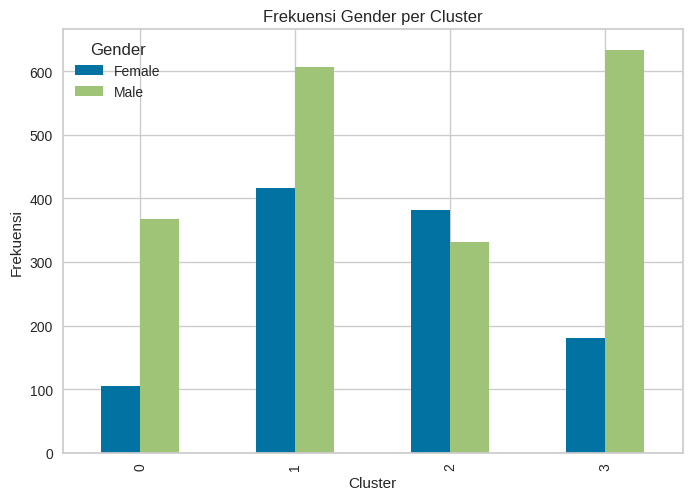

In [157]:
# Visualisasi
gender_cluster_count.plot(kind='bar', stacked=False)
plt.title('Frekuensi Gender per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frekuensi')
plt.show()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [158]:
data_normalized[['CGPA', 'CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'SGPA']] = min_max_scaler.inverse_transform(data_normalized[['CGPA', 'CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'SGPA']])
data_normalized.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

Tulis hasil interpretasinya di sini.
### 1. Cluster 0: Mahasiswa dengan Performa Akademik Rendah
- CGPA Rata-rata: 2.42 (terendah di antara semua cluster).
- Rentang CGPA: 1.52 - 3.00.
- SGPA Rata-rata: 2.78.
- Jumlah Mahasiswa: 473 (105 perempuan, 368 laki-laki).
- Tahun Kelulusan (YoG): Mayoritas sekitar 2012.

**Analisa**:
- Cluster ini terdiri dari mahasiswa dengan performa akademik terendah (CGPA & SGPA rendah).
- Banyak mahasiswa dalam cluster ini mungkin memiliki kesulitan akademik atau kurang termotivasi dalam studi.
- Sebagian besar anggotanya adalah laki-laki (368 vs. 105).
- **Kemungkinan pola**: Mahasiswa dengan CGPA rendah bisa disebabkan oleh faktor seperti kurangnya dukungan akademik, ketidaksesuaian dengan jurusan, atau kurangnya keterlibatan dalam pembelajaran.


### 2. Cluster 1: Mahasiswa dengan Performa Akademik Menengah
- CGPA Rata-rata: 3.72.
- Rentang CGPA: 3.17 - 4.21.
- SGPA Rata-rata: 3.12.
- Jumlah Mahasiswa: 1023 (416 perempuan, 607 laki-laki).
- Tahun Kelulusan (YoG): Mayoritas 2012.

**Analisa**:
- Mahasiswa dalam cluster ini memiliki performa akademik menengah hingga cukup baik.
- CGPA mereka berada di rentang 3.17 - 4.21, menunjukkan mereka memiliki dasar akademik yang cukup kuat.
- Perbandingan gender lebih seimbang dibandingkan cluster lainnya (607 laki-laki, 416 perempuan).
- **Kemungkinan pola**: Mahasiswa di kelompok ini mungkin memiliki strategi belajar yang cukup baik atau lebih aktif dalam akademik, tetapi tidak mencapai level tertinggi seperti Cluster 2.

### 3. Cluster 2: Mahasiswa dengan Performa Akademik Tinggi
- CGPA Rata-rata: 4.37 (tertinggi di antara semua cluster).
- Rentang CGPA: 3.85 - 4.99.
- SGPA Rata-rata: 3.50.
- Jumlah Mahasiswa: 713 (382 perempuan, 331 laki-laki).
- Tahun Kelulusan (YoG): Mayoritas 2012.

**Analisa**:
- Cluster ini adalah kelompok mahasiswa berprestasi tinggi dengan CGPA di atas 4.0.
- Lebih banyak perempuan dalam kelompok ini (382 vs. 331 laki-laki), menunjukkan bahwa mahasiswi dalam dataset ini memiliki kecenderungan akademik lebih baik.
- Kemungkinan pola: Mahasiswa di kelompok ini kemungkinan memiliki kebiasaan belajar yang baik, lebih terlibat dalam kegiatan akademik, dan lebih disiplin dalam studi mereka.

### 4. Cluster 3: Mahasiswa dengan Performa Akademik Rata-rata ke Bawah
- CGPA Rata-rata: 3.11.
- Rentang CGPA: 2.31 - 3.77.
- SGPA Rata-rata: 2.98.
- Jumlah Mahasiswa: 814 (180 perempuan, 634 laki-laki).
- Tahun Kelulusan (YoG): Mayoritas 2012.

**Analisa**:
- Cluster ini mencakup mahasiswa dengan performa akademik di bawah rata-rata tetapi lebih baik dari Cluster 0.
- CGPA mereka berkisar antara 2.31 - 3.77.
- Didominasi oleh laki-laki (634 vs. 180 perempuan).
- Kemungkinan pola: Meskipun nilai mereka tidak buruk, mereka mungkin mengalami beberapa tantangan akademik tertentu. Faktor seperti kesulitan adaptasi, kurangnya motivasi, atau kurangnya dukungan akademik bisa menjadi penyebabnya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [159]:
# Simpan ke CSV
df_labeled.to_csv("CGPA_clustered.csv", index=False)